In [113]:
# Dataset 1 : Wines

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt

# Feature selection
from sklearn.decomposition import FastICA
# preprocessing
from sklearn.preprocessing import MinMaxScaler
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

#dataset
dataset = io.open('wine-quality-white-and-red.csv', encoding='latin-1')
data = pd.read_csv(dataset)
#data = data.take([10*i for i in range(649)], axis = 0)
data = data.apply(LabelEncoder().fit_transform)

#input
X = data.drop(columns=['type'])

#output
y = data['type']

data.shape

(6497, 13)

In [57]:
# Import the class
from sklearn.preprocessing import StandardScaler

# Create the object 
scaler = StandardScaler()
# Calculate the mean and the standard deviation
scaler.fit(X)
# Transform the values
X_scaled = scaler.transform(X)

/Users/ye/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/ye/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/ye/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/ye/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/ye/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/ye/opt/anaconda3/lib/python3.9/site-packages/skl

time for running the algorithm = 0.457811739994213 s


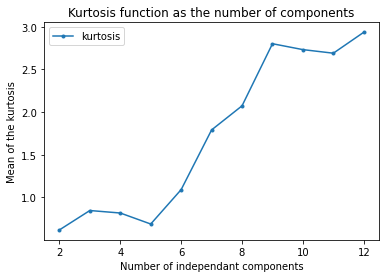

In [108]:
from scipy.stats import kurtosis
import statistics

list_kurtosis = []

time1 = time.perf_counter()

for i in range(2,13):
    ica = FastICA(n_components = i, random_state = 42)
    X_ica = ica.fit_transform(X_scaled)
    kurt = np.abs(statistics.mean(kurtosis(X_ica)))
    list_kurtosis.append(kurt)
    
time2 = time.perf_counter()
timeA = time2 - time1
print('time for running the algorithm =',timeA,'s')
    
number_of_components = [i for i in range(2,13)]
fig, ax = plt.subplots()
ax.set_title('Kurtosis function as the number of components for dataset 1')
ax.set_xlabel('Number of independant components')
ax.set_ylabel('Mean of the kurtosis')
ax.plot(number_of_components, list_kurtosis, marker=".", label="kurtosis")
ax.legend()
plt.show()

/Users/ye/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


[ 3.67601787 18.11464452  3.58446879 -0.90065583  1.18852843  1.34041461
  0.65285848  2.66453064  0.94905088  2.52287618 -0.51527883  1.95592164]


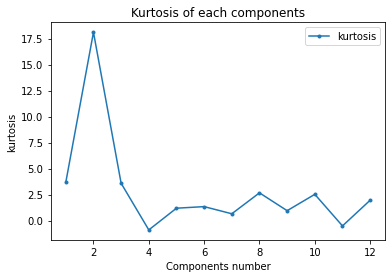

In [123]:
ica = FastICA(n_components = 12, random_state = 42)
X_ica = ica.fit_transform(X_scaled)
kurt1 = kurtosis(X_ica)
print(kurt1)

number_of_components1 = [i for i in range(1,13)]
fig, ax = plt.subplots()
ax.set_title('Kurtosis of each components')
ax.set_xlabel('Components number')
ax.set_ylabel('kurtosis')
ax.plot(number_of_components1, kurt1, marker=".", label="kurtosis")
ax.legend()
plt.show()

In [121]:
df_new = pd.DataFrame(X_ica, columns =['PC1','PC2','PC3','PC4','PC5'
                                         ,'PC6','PC7','PC8','PC9','PC10','PC11','PC12'] )

df_new['type'] = data.type
df_new = df_new.drop(columns=['PC4'])
#df_new = df_new.drop(columns=['PC5'])
#df_new = df_new.drop(columns=['PC6'])
#df_new = df_new.drop(columns=['PC7'])
#df_new = df_new.drop(columns=['PC9'])
df_new = df_new.drop(columns=['PC11'])
df_new.head()

,PC1,PC2,PC3,PC5,PC6,PC7,PC8,PC9,PC10,PC12,type
0,-0.000136,0.002263,-0.003405,0.009107,-0.023121,0.003318,-0.005503,0.016111,-0.002631,-0.006395,1
1,0.002967,0.003467,-0.011755,0.014688,-0.003133,-0.002076,0.003120,-0.015942,-0.006144,-0.009836,1
2,0.010167,-0.001900,0.003431,-0.000576,-0.007156,-0.016066,-0.023050,0.009029,0.007029,-0.001105,1
3,0.014037,-0.006384,-0.001904,0.006082,0.003649,-0.004878,-0.006840,-0.005804,-0.005455,0.002728,1
4,0.014037,-0.006384,-0.001904,0.006082,0.003649,-0.004878,-0.006840,-0.005804,-0.005455,0.002728,1


In [122]:
# save the data
df_new.to_csv('wine_quality_ica.csv', index=False)

In [120]:
kurt = np.abs(kurtosis(df_new))

print(kurt)


[ 3.67601787 18.11464452  3.58446879  2.66453064  2.52287618  1.95592164
  0.61037574]


In [126]:
df_new1 = pd.DataFrame(X_ica, columns =['PC1','PC2','PC3','PC4','PC5'
                                         ,'PC6','PC7','PC8','PC9','PC10','PC11','PC12'] )

df_new1['type'] = data.type
df_new1.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,type
0,-0.000136,0.002263,-0.003405,-0.017506,0.009107,-0.023121,0.003318,-0.005503,0.016111,-0.002631,0.018331,-0.006395,1
1,0.002967,0.003467,-0.011755,0.000285,0.014688,-0.003133,-0.002076,0.003120,-0.015942,-0.006144,-0.021364,-0.009836,1
2,0.010167,-0.001900,0.003431,0.006793,-0.000576,-0.007156,-0.016066,-0.023050,0.009029,0.007029,-0.003317,-0.001105,1
3,0.014037,-0.006384,-0.001904,-0.005715,0.006082,0.003649,-0.004878,-0.006840,-0.005804,-0.005455,0.011334,0.002728,1
4,0.014037,-0.006384,-0.001904,-0.005715,0.006082,0.003649,-0.004878,-0.006840,-0.005804,-0.005455,0.011334,0.002728,1


In [127]:
# save the data
df_new.to_csv('wine_quality_ica1.csv', index=False)